# EXERCISES 10-10-23



In [15]:
from time import time
from matplotlib import pyplot as plt
import numpy as np
from random import random
from mylib.matstyle import hist_style

## Exercise 4.1
Write a function that implements the linear congruential generator for pseudo-random numbers, using these parameters:

M = 2147483647
A = 214013
C = 2531011


In [16]:
class RandomLCG:
  def __init__(self,A,C,M,seed=0):
    self.A = A
    self.M = M
    self.C = C
    self.x = seed
    self.seed = seed
  def nextInt(self, min,max):
    self.x = (self.A*self.x+self.C)%self.M
    self.seed = self.x
    return (self.x%(max+1)) + min
  def setSeed(self,seed):
    self.seed = seed
    self.x = seed

randLCG = RandomLCG(M = 2147483647,A = 214013,C = 2531011,seed=int(time()))
for _ in range(0,5):
  print(randLCG.nextInt(0,12),end=' ')

3 2 5 4 11 

# Exercise 4.2

To be solved after lecture 5 Implement the generator in the form of an object, which contains a method for generating a random number and a method for setting the generation seed, using an appropriate variable of the class to store this information.

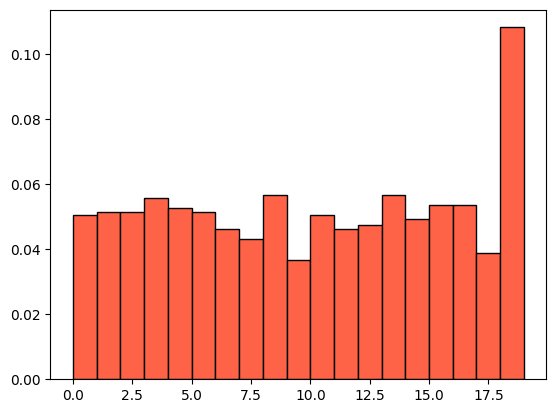

In [17]:
from mylib.radom_numbers import RandomLCG

r = RandomLCG(M = 2147483647,A = 214013,C = 2531011, seed=int(time()))
nums = np.array([r.nextInt(0,20) for _ in range(1000)])

plt.hist(nums,**hist_style(bins=range(0,20)))
plt.show()


## Exercises 4.3
Show that initializing the seed of a pseudo-random integer generator is equivalent to looking into a sequence of pseudo-random numbers at any point.

In [18]:
L = 6

r0 = RandomLCG(M = 2147483647,A = 214013,C = 2531011, seed=int(time()))
r0d = {i:(r0.seed,r0.nextInt(0,10)) for i in range(L)}

r3 = RandomLCG(M = 2147483647,A = 214013,C = 2531011, seed=r0d[3][0])
r3d = {i:(r3.seed,r3.nextInt(0,10)) for i in range(3,L)}

print(r0d)
print(r3d)

{0: (1705056666, 2), 1: (1726009782, 2), 2: (2019369354, 4), 3: (949548098, 2), 4: (1409596322, 9), 5: (2027395225, 8)}
{3: (949548098, 2), 4: (1409596322, 9), 5: (2027395225, 8)}


## Exercises 4.4
Implement a pseudo-random number generator according to a uniform distribution between two arbitrary endpoints.

Use the matplotlib library to visualize the distribution of the generated numbers.


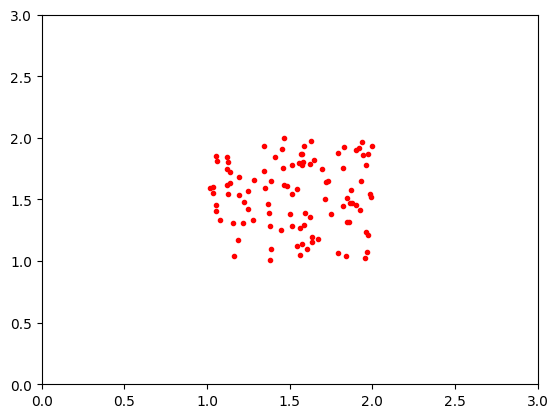

In [19]:
def rand_uniform(min,max,size=1):
    if size==1: return np.random.rand()*(max-min) + min
    return np.random.rand(size)*(max-min) + min

X = rand_uniform(1,2,100)
Y = rand_uniform(1,2,100)
plt.plot(X,Y,'o',color='red',markersize=3)
plt.xlim((0,3))
plt.ylim((0,3))
plt.show()

## Exercise 4.5
Implement a pseudo-random number generator that uses the try-and-catch method to generate pseudo-random numbers according to an arbitrary probability distribution.

Take the probability density function (pdf) as an input parameter for generating random numbers.

Use the matplotlib library to visualize the distribution of the generated numbers.

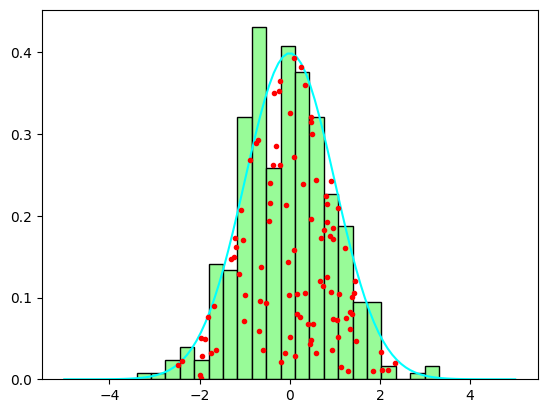

In [20]:
from scipy.stats import norm
import mylib.radom_numbers

x = np.linspace(-5,5,100)
norm_fix = norm (0, 1)

def rand_TAC_points(f, xmin,xmax,ymax, size = 1):
    l = np.empty(size,dtype=tuple)
    for i in range(size):
        randX = rand_uniform(xmin,xmax,size=1)
        randY = rand_uniform(0,ymax,size=1)
        while f(randX) < randY:
            randX = rand_uniform(xmin,xmax,size=1)
            randY = rand_uniform(0,ymax,size=1)
        l[i] = (randX,randY)
    return l[0] if size == 1 else l

def rand_TAC(pdf,xmin,xmax,size=1):
    l = np.empty(size,dtype=np.float64)
    for i in range(size):
        randX = rand_uniform(xmin,xmax,size=1)
        while pdf(randX) < rand_uniform(0,1,size=1):
            randX = rand_uniform(xmin,xmax,size=1)
        l[i] = randX
    return l[0] if size == 1 else l

points = rand_TAC_points(lambda x: norm.pdf(x,loc=0,scale=1),-5,5,1,size=100)
hists = rand_TAC(lambda x: norm.pdf(x,loc=0,scale=1),-5,5,size=400)

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist(hists,**hist_style(len(hists),color='palegreen'))
ax.plot(x,norm_fix.pdf(x), color ='aqua')
ax.plot(*zip(*points),'o',color='red',markersize=3)
plt.show()



## Exercise 4.6
Implement a pseudo-random number generator that uses the inverse function method to generate events distributed according to an exponential probability distribution.

Use the matplotlib library to visualize the distribution of the generated numbers.

$y = F(x) = 1-e^{-\lambda x}$

$x = F^{-1}(y) = -\frac{\log(1-y)}{\lambda}$

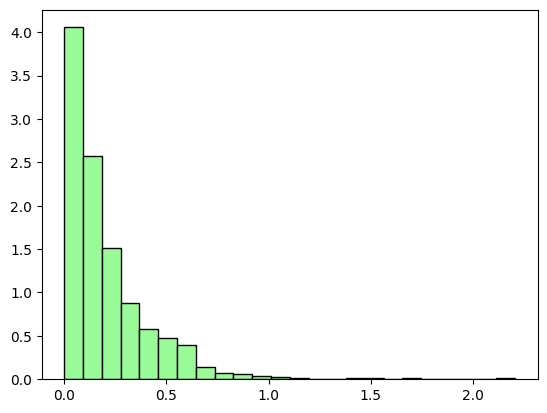

In [21]:
# lambda = 1

def exponential_random(l=1,size = 1):
  if size == 1: return -np.log(1-np.random.rand())/l
  else: return -np.log(1-np.random.rand(size))/l

x = exponential_random(5,1000)
plt.hist(x,**hist_style(1000))
plt.show()

## Exercise 4.7
Implement a pseudo-random number generator that uses the central limit theorem method to generate events distributed according to a Gaussian probability distribution.

How can you obtain a normal distribution, i.e., a Gaussian distribution centered at zero with unit variance?

Visually verify that as the number of events increases, the similarity between the obtained distribution and the Gaussian functional form increases, both graphically and by using the moments of the distributions calculated on the generated event sample.

$\sigma = \frac{(b-a)}{\sqrt{12 N}}$

$\sigma=1 \quad \bar{x}=0 \Rightarrow b-a = \sqrt{12 N} \quad \frac{a+b}{2} = 0 \Rightarrow b = \frac{\sqrt{12N}}{2} \quad a = -\frac{\sqrt{12N}}{2}$

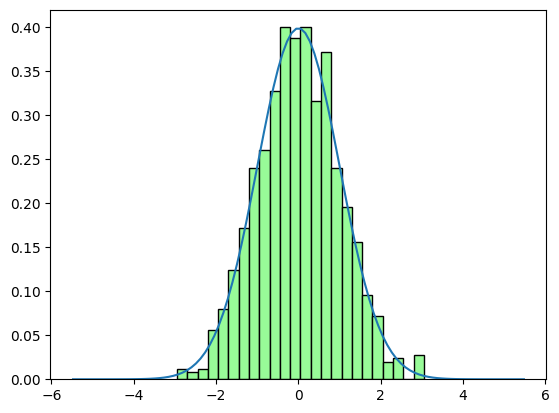

In [22]:
N = 10
size =1000
a,b = -np.sqrt(12*N)/2,np.sqrt(12*N)/2
X = np.array([np.mean(rand_uniform(a,b,N)) for _ in range(size)])
x = np.linspace(a,b,100)
plt.hist(X,**hist_style(len(X)))
plt.plot(x,norm.pdf(x,loc=0,scale=1))
plt.show()

## Exercise 4.8
To be solved after lecuture 4 Implement an object named stats, which calculates the statistics associated with a sample of numbers stored in a Python list.

What different design options are possible for this object?

What variables need to be added to the class to ensure its functionality?

What values should these variables have during initialization?

In [23]:
class StatsUniform:
  def __init__(self,X):
    self.X = X
    self.mean = (max(X)-min(X))/2
    self.std = (max(X)-min(X))/np.sqrt(12)
    self.var = self.std**2
  def __repr__(self):
    return (f"""
mean: {self.mean}
std: {self.std}
variance: {self.var}
    """)

## Exercise 4.9

To be solved after lecuture 4 Test the stats object with each of the implemented generation algorithms. In particular, then:

Verify that the value of the variance for the uniform distribution corresponds to expectations (what is the uncertainty associated with the obtained number?)

Verify that the value of the variance obtained using the central limit theorem technique corresponds to the expected one.


In [24]:
r_array = np.random.rand(5,1000)

r = [StatsUniform(i) for i in r_array]

expected_variance = 1/12
mean_variance = np.mean(list(map(lambda x: x.var,r)))

print(f"Expected variance: {expected_variance}, mean_variance: {mean_variance}")



Expected variance: 0.08333333333333333, mean_variance: 0.08305322592942331
